# West Nile Analysis

In [101]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.cross_validation import train_test_split, KFold, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

In [102]:
train = pd.read_csv('../data/trainw.csv')
test  = pd.read_csv('../data/testw.csv')
train.columns = [col.lower().replace(' ', '_') for col in train.columns]
test.columns = [col.lower().replace(' ', '_') for col in test.columns]

                    

In [103]:
test.columns

Index(['unnamed:_0', 'index', 'id', 'date', 'address', 'block', 'street',
       'trap', 'addressnumberandstreet', 'latitude', 'longitude',
       'addressaccuracy', 'year', 'month', 'day', 'tmax_x', 'tmin_x', 'tavg_x',
       'depart_x', 'dewpoint_x', 'wetbulb_x', 'heat_x', 'cool_x', 'sunrise_x',
       'sunset_x', 'codesum_x', 'depth_x', 'water1_x', 'snowfall_x',
       'preciptotal_x', 'stnpressure_x', 'sealevel_x', 'resultspeed_x',
       'resultdir_x', 'avgspeed_x', 'tmax_y', 'tmin_y', 'tavg_y', 'depart_y',
       'dewpoint_y', 'wetbulb_y', 'heat_y', 'cool_y', 'sunrise_y', 'sunset_y',
       'codesum_y', 'depth_y', 'water1_y', 'snowfall_y', 'preciptotal_y',
       'stnpressure_y', 'sealevel_y', 'resultspeed_y', 'resultdir_y',
       'avgspeed_y', 'species_culex_pipiens', 'species_culex_pipiens/restuans',
       'species_culex_restuans', 'species_culex_salinarius',
       'species_culex_tarsalis', 'species_culex_territans',
       'species_unspecified_culex', 'distance', 'dist_spec

In [104]:
train.columns

Index(['unnamed:_0', 'address', 'addressaccuracy', 'addressnumberandstreet',
       'avgspeed_x', 'avgspeed_y', 'block', 'codesum_x', 'codesum_y', 'cool_x',
       'cool_y', 'date', 'day', 'depart_x', 'depart_y', 'depth_x', 'depth_y',
       'dewpoint_x', 'dewpoint_y', 'distance', 'heat_x', 'heat_y', 'index',
       'latitude', 'longitude', 'month', 'nummosquitos', 'preciptotal_x',
       'preciptotal_y', 'resultdir_x', 'resultdir_y', 'resultspeed_x',
       'resultspeed_y', 'sealevel_x', 'sealevel_y', 'snowfall_x', 'snowfall_y',
       'species_culex_pipiens', 'species_culex_pipiens/restuans',
       'species_culex_restuans', 'species_culex_salinarius',
       'species_culex_tarsalis', 'species_culex_territans', 'stnpressure_x',
       'stnpressure_y', 'street', 'sunrise_x', 'sunrise_y', 'sunset_x',
       'sunset_y', 'tavg_x', 'tavg_y', 'tmax_x', 'tmax_y', 'tmin_x', 'tmin_y',
       'trap', 'water1_x', 'water1_y', 'wetbulb_x', 'wetbulb_y', 'wnvpresent',
       'year', 'dist_species_c

In [105]:
#included features
features = [ 'trap', 'block', 'month', "street", 
            'species_culex_pipiens', 'species_culex_pipiens/restuans',
            'species_culex_restuans', 'species_culex_salinarius',
            'species_culex_tarsalis', 'species_culex_territans', 'tmax_y', 'tmin_y', 
            'tavg_y', 'dewpoint_y',
            'wetbulb_y', 'heat_y', 'cool_y', 'sunrise_y', 'sunset_y',
            'depth_y', 'water1_y', 'snowfall_y', 'preciptotal_y', 'stnpressure_y',
            'sealevel_y', 'resultspeed_y', 'resultdir_y', 'avgspeed_y', 'distance', 'dist_species_culex_pipiens',
            'dist_species_culex_pipiens/restuans', 'dist_species_culex_restuans',
            'dist_species_culex_salinarius', 'dist_species_culex_tarsalis',
            'dist_species_culex_territans']

X = train[features]
y = train['wnvpresent']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 6, stratify = y)

In [107]:
 X_train.head().T

,10477,1929,6,3078,3279
trap,76.000000,11.000000,33.000000,9.000000,40.000000
block,0.000000,41.000000,12.000000,21.000000,10.000000
month,9.000000,8.000000,5.000000,9.000000,9.000000
street,62.000000,121.000000,123.000000,39.000000,133.000000
species_culex_pipiens,0.000000,1.000000,0.000000,0.000000,0.000000
species_culex_pipiens/restuans,0.000000,0.000000,0.000000,1.000000,1.000000
species_culex_restuans,1.000000,0.000000,1.000000,0.000000,0.000000
species_culex_salinarius,0.000000,0.000000,0.000000,0.000000,0.000000
species_culex_tarsalis,0.000000,0.000000,0.000000,0.000000,0.000000
species_culex_territans,0.000000,0.000000,0.000000,0.000000,0.000000


In [108]:
datasets = (X_train, y_train)
traincombined = pd.concat(datasets, axis = 1)
traincombined.head()

,trap,block,month,street,species_culex_pipiens,species_culex_pipiens/restuans,species_culex_restuans,species_culex_salinarius,species_culex_tarsalis,species_culex_territans,...,resultdir_y,avgspeed_y,distance,dist_species_culex_pipiens,dist_species_culex_pipiens/restuans,dist_species_culex_restuans,dist_species_culex_salinarius,dist_species_culex_tarsalis,dist_species_culex_territans,wnvpresent
10477,76,0,9.0,62,0,0,1,0,0,0,...,9,4.6,0.488413,0.000000,0.000000,0.488413,0.0,0.0,0.0,0.0
1929,11,41,8.0,121,1,0,0,0,0,0,...,6,7.1,0.539636,0.539636,0.000000,0.000000,0.0,0.0,0.0,0.0
6,33,12,5.0,123,0,0,1,0,0,0,...,16,7.4,0.358443,0.000000,0.000000,0.358443,0.0,0.0,0.0,0.0
3078,9,21,9.0,39,0,1,0,0,0,0,...,5,6.0,1.771727,0.000000,1.771727,0.000000,0.0,0.0,0.0,1.0
3279,40,10,9.0,133,0,1,0,0,0,0,...,19,12.8,0.622362,0.000000,0.622362,0.000000,0.0,0.0,0.0,0.0


In [109]:
west_nile = traincombined[traincombined.wnvpresent == 1]

In [110]:
extra_west_nile = west_nile.sample(n = 5000, replace = True, random_state = 63, axis = 0)

In [111]:
merge = [traincombined, extra_west_nile]
traincombined = pd.concat(merge, axis = 0)

In [112]:
traincombined.shape

(12879, 36)

In [113]:
traincombined.corr()

,trap,block,month,street,species_culex_pipiens,species_culex_pipiens/restuans,species_culex_restuans,species_culex_salinarius,species_culex_tarsalis,species_culex_territans,...,resultdir_y,avgspeed_y,distance,dist_species_culex_pipiens,dist_species_culex_pipiens/restuans,dist_species_culex_restuans,dist_species_culex_salinarius,dist_species_culex_tarsalis,dist_species_culex_territans,wnvpresent
trap,1.000000,-0.259146,-0.029578,0.197421,-0.037503,-0.002732,0.045153,0.007234,-0.000536,0.004699,...,0.040890,0.018168,0.183589,0.011201,0.082209,0.079644,0.010798,-0.001783,0.005767,0.026919
block,-0.259146,1.000000,0.013602,-0.206843,-0.041999,0.039441,-0.001663,-0.006498,-0.001049,0.010411,...,0.016585,-0.014559,-0.090142,-0.035926,-0.037457,-0.015996,-0.008609,0.002291,0.005438,0.016278
month,-0.029578,0.013602,1.000000,-0.034562,0.255032,0.009221,-0.312506,-0.017877,0.013055,0.001658,...,0.058868,-0.162608,-0.152584,0.191888,-0.049448,-0.273796,-0.027393,0.013744,-0.013376,0.252294
street,0.197421,-0.206843,-0.034562,1.000000,-0.030404,0.024008,0.007961,-0.002077,0.005918,-0.008601,...,-0.027055,-0.021211,0.038084,-0.012860,0.035814,0.010911,-0.001301,0.005695,-0.014797,0.010803
species_culex_pipiens,-0.037503,-0.041999,0.255032,-0.030404,1.000000,-0.646863,-0.338064,-0.045736,-0.010564,-0.078113,...,-0.036678,-0.065930,-0.167452,0.842751,-0.514810,-0.290456,-0.039382,-0.009734,-0.070025,0.196968
species_culex_pipiens/restuans,-0.002732,0.039441,0.009221,0.024008,-0.646863,1.000000,-0.456552,-0.061766,-0.014267,-0.105491,...,0.040788,-0.010476,0.068515,-0.545145,0.795856,-0.392257,-0.053185,-0.013146,-0.094568,0.026525
species_culex_restuans,0.045153,-0.001663,-0.312506,0.007961,-0.338064,-0.456552,1.000000,-0.032280,-0.007456,-0.055132,...,-0.013606,0.085286,0.109178,-0.284904,-0.363350,0.859174,-0.027795,-0.006870,-0.049423,-0.230050
species_culex_salinarius,0.007234,-0.006498,-0.017877,-0.002077,-0.045736,-0.061766,-0.032280,1.000000,-0.001009,-0.007459,...,0.006690,0.016923,0.001262,-0.038544,-0.049157,-0.027734,0.861064,-0.000929,-0.006686,-0.056270
species_culex_tarsalis,-0.000536,-0.001049,0.013055,0.005918,-0.010564,-0.014267,-0.007456,-0.001009,1.000000,-0.001723,...,-0.004647,-0.007043,0.018884,-0.008903,-0.011354,-0.006406,-0.000869,0.921428,-0.001544,-0.012997
species_culex_territans,0.004699,0.010411,0.001658,-0.008601,-0.078113,-0.105491,-0.055132,-0.007459,-0.001723,1.000000,...,0.016318,0.013279,0.006461,-0.065830,-0.083956,-0.047368,-0.006422,-0.001587,0.896452,-0.096104


In [114]:
X_train = traincombined[features]
y_train = traincombined['wnvpresent']

In [115]:

X_train.head().T

,10477,1929,6,3078,3279
trap,76.000000,11.000000,33.000000,9.000000,40.000000
block,0.000000,41.000000,12.000000,21.000000,10.000000
month,9.000000,8.000000,5.000000,9.000000,9.000000
street,62.000000,121.000000,123.000000,39.000000,133.000000
species_culex_pipiens,0.000000,1.000000,0.000000,0.000000,0.000000
species_culex_pipiens/restuans,0.000000,0.000000,0.000000,1.000000,1.000000
species_culex_restuans,1.000000,0.000000,1.000000,0.000000,0.000000
species_culex_salinarius,0.000000,0.000000,0.000000,0.000000,0.000000
species_culex_tarsalis,0.000000,0.000000,0.000000,0.000000,0.000000
species_culex_territans,0.000000,0.000000,0.000000,0.000000,0.000000


In [116]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators'       : [ 100,150, 200],
    'max_depth'          : [20 , 40, 60 ],
    'min_samples_leaf'   : [ 3, 6 , 9]
}



In [117]:
gs = GridSearchCV(rf, param_grid=rf_params)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
gs.score(X_test, y_test)


0.9349328364003416
{'max_depth': 40, 'min_samples_leaf': 3, 'n_estimators': 100}


0.8956985154168253

In [118]:
y_hat = gs.predict(X_test)
y_hat_train = gs.predict(X_train)
y_hat_prob = gs.predict_proba(X_test)


In [119]:
print(classification_report( y_train, y_hat_train))

             precision    recall  f1-score   support

        0.0       0.99      0.95      0.97      7466
        1.0       0.93      0.98      0.96      5413

avg / total       0.96      0.96      0.96     12879



In [120]:
print(classification_report(y_test, y_hat))

             precision    recall  f1-score   support

        0.0       0.96      0.93      0.94      2489
        1.0       0.19      0.31      0.24       138

avg / total       0.92      0.90      0.91      2627



In [121]:
confusion_matrix(y_train, y_hat_train)

array([[7092,  374],
       [ 106, 5307]])

In [122]:
confusion_matrix(y_test, y_hat)

array([[2310,  179],
       [  95,   43]])

In [123]:
X = test[features]
predict = (gs.predict(X))
predprob = gs.predict_proba(X)

In [124]:
predprob

array([[0.90326527, 0.09673473],
       [0.97348521, 0.02651479],
       [0.89363141, 0.10636859],
       ...,
       [0.94845588, 0.05154412],
       [0.94845588, 0.05154412],
       [0.94845588, 0.05154412]])

In [125]:
rf = RandomForestClassifier(n_estimators= 150, max_depth=40, min_samples_leaf= 7 )
rf.fit(X_train, y_train)
print(X_train.columns)
rf.feature_importances_

Index(['trap', 'block', 'month', 'street', 'species_culex_pipiens',
       'species_culex_pipiens/restuans', 'species_culex_restuans',
       'species_culex_salinarius', 'species_culex_tarsalis',
       'species_culex_territans', 'tmax_y', 'tmin_y', 'tavg_y', 'dewpoint_y',
       'wetbulb_y', 'heat_y', 'cool_y', 'sunrise_y', 'sunset_y', 'depth_y',
       'water1_y', 'snowfall_y', 'preciptotal_y', 'stnpressure_y',
       'sealevel_y', 'resultspeed_y', 'resultdir_y', 'avgspeed_y', 'distance',
       'dist_species_culex_pipiens', 'dist_species_culex_pipiens/restuans',
       'dist_species_culex_restuans', 'dist_species_culex_salinarius',
       'dist_species_culex_tarsalis', 'dist_species_culex_territans'],
      dtype='object')


array([9.59521864e-02, 6.64561285e-02, 1.10241303e-01, 7.34728271e-02,
       1.08676946e-02, 9.23711507e-03, 2.02195539e-02, 3.78489483e-05,
       0.00000000e+00, 2.77163692e-03, 3.87933045e-02, 3.30551240e-02,
       4.10805293e-02, 3.07174424e-02, 3.23039616e-02, 4.50402823e-03,
       4.60374575e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.78849146e-02, 2.72373868e-02,
       3.12246482e-02, 4.91741552e-02, 2.53630988e-02, 3.80508151e-02,
       7.68283036e-02, 3.55562351e-02, 5.10969853e-02, 2.86905468e-02,
       7.57909019e-06, 0.00000000e+00, 3.13718865e-03])

In [126]:
y_rfp = rf.predict_proba(X_test)
y_rf = rf.predict(X_test)

In [127]:
X_test.loc[:, 'actual_y'] = y_test
X_test.loc[:, 'predicted_label'] = y_rf
X_test.loc[:, 'predicted_proba'] = y_rfp[:, 1]


In [128]:
fpr, tpr, _ = roc_curve(y_test, X_test['predicted_proba'])
roc_auc = auc(fpr, tpr)

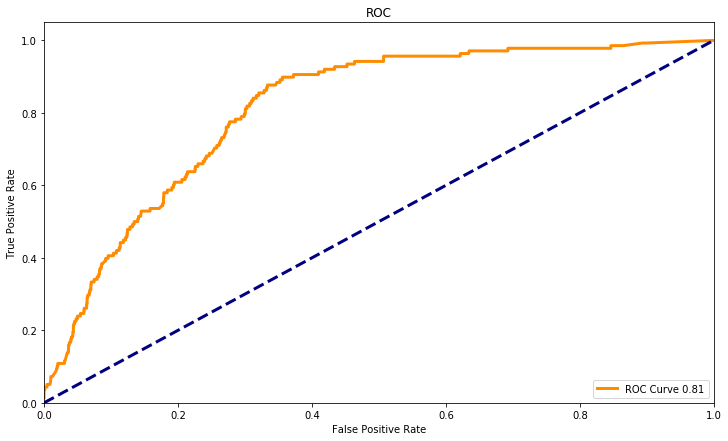

In [129]:
# Plot 
plt.figure(figsize = (12,7))
line_width = 3

plt.plot(fpr, tpr, lw = line_width, color="darkorange", label = "ROC Curve %.2f" % roc_auc)
plt.plot([0,1], [0, 1], lw = line_width, linestyle="--", color="navy")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [26]:
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors' : [7, 9, 11],
    'weights'      : ['uniform','distance']
}

gs = GridSearchCV(knn, param_grid=knn_params)
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)
print(gs.score(X_test,y_test))
y_hat = gs.predict(X_test)
y_hat_train = gs.predict(X_train)
print(classification_report(y_test, y_hat))

{'n_neighbors': 9, 'weights': 'uniform'}
0.9468206625206245
0.9432813094784925
             precision    recall  f1-score   support

        0.0       0.95      0.99      0.97      2489
        1.0       0.18      0.02      0.04       138

avg / total       0.91      0.94      0.92      2627



In [27]:
predict_knn = gs.predict(X)

In [28]:
lr = LogisticRegressionCV(Cs= [1., 1, 10])
lr.fit(X_train, y_train)

LogisticRegressionCV(Cs=[1.0, 1, 10], class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [29]:
y_lrp = lr.predict_proba(X_test)
y_lr = lr.predict(X_test)
lr.score(X_test,y_test)

0.9474685953559193

In [30]:
X_test.loc[:, 'actual_y'] = y_test
X_test.loc[:, 'predicted_label'] = y_lr
X_test.loc[:, 'predicted_proba'] = y_lrp[:, 1]

In [31]:
# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(y_test, X_test['predicted_proba'])
roc_auc = auc(fpr, tpr)

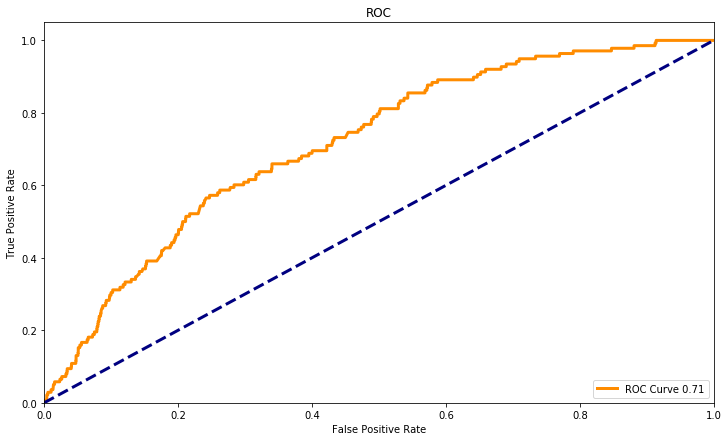

In [32]:
# Plot 
plt.figure(figsize = (12,7))
line_width = 3

plt.plot(fpr, tpr, lw = line_width, color="darkorange", label = "ROC Curve %.2f" % roc_auc)
plt.plot([0,1], [0, 1], lw = line_width, linestyle="--", color="navy")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [131]:
rf_predict = rf.predict(X)
rf_proba = rf.predict_proba(X)[:,1]

In [132]:
rf_proba

array([0.12334999, 0.03779958, 0.14480453, ..., 0.09340408, 0.09340408,
       0.09340408])

In [133]:
submissions = pd.DataFrame(rf_predict, columns = ['wnvpresent'])
submissions['predproba'] = rf_proba
submissions.loc[:, 'wnvpresent']= submissions['predproba'].map(
    lambda p: 1 if p > .38 else 0)

In [134]:
submissions.wnvpresent.value_counts()

0    113691
1      2602
Name: wnvpresent, dtype: int64

In [135]:
submissions['id'] = [id +1 for id in range(len(submissions))]

In [136]:
submissions = submissions[['id','wnvpresent' ]]


In [137]:
submissions.to_csv('../data/submission.csv', index = False)